# Figure 3: basin slices

In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.colors import ListedColormap

sys.path.append("../code/")

from hypersync_draw import *
from hypersync_generate import *
from hypersync_identify import *
from hypersync_integrate import *

sb.set_theme(
    style="ticks",
    context="paper",
    # rc={"text.usetex": True, "font.family": "serif", "font.serif": "mathpazo"},
)

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

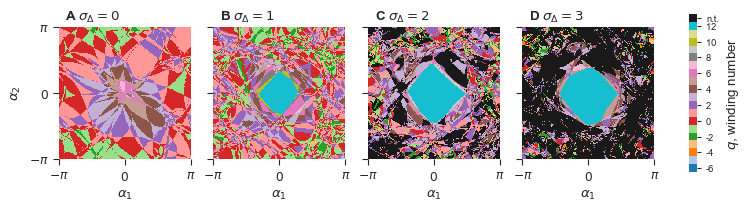

In [9]:
sigmas = [0, 1, 2, 3]
basins = [None] * len(sigmas)

fig, axs = plt.subplots(
    1, len(sigmas), sharex=True, sharey=True, figsize=(7.4, 2), layout="constrained"
)

# colors = sb.color_palette("coolwarm", n_colors=26)[6:]
colors = sb.color_palette("tab20")
colors[-1] = "k"
cmap = ListedColormap(colors)

for i, sigma in enumerate(sigmas):
    basins[i] = np.loadtxt(f"../data/q=12_sigma={sigma}.txt", delimiter=",")
    flag = 0
    if 99 in basins[i]:
        flag = 1
        no_sync = np.unique(basins[i])[-2] + 1
        basins[i][basins[i] == 99] = no_sync

    im = axs[i].imshow(
        basins[i],
        cmap=cmap,
        aspect="equal",
        vmin=-6 - 0.5,
        vmax=13 + 0.5,
        # alpha=0.9,
        origin="lower",
        interpolation="none",
        extent=[-np.pi, np.pi, -np.pi, np.pi],
    )

    axs[i].set_xlabel(r"$\alpha_1$")
    axs[i].set_xticks([-np.pi, 0, np.pi])
    axs[i].set_yticks([-np.pi, 0, np.pi])
    axs[i].set_xticklabels([r"$-\pi$", "$0$", r"$\pi$"])

    letter = ["A", "B", "C", "D"]

    axs[i].text(
        0.05,
        1.05,
        f"{letter[i]} $\sigma_{{\Delta}} = {sigma}$",
        transform=axs[i].transAxes,
        weight="bold"
    )


axs[0].set_yticklabels([r"$-\pi$", "$0$", r"$\pi$"])

axs[0].set_ylabel(r"$\alpha_2$")

ticks = list(range(-6, 13, 2)) + [13]
cbar = fig.colorbar(im, ax=axs, ticks=ticks, shrink=1.2, label="$q$, winding number")

for ax in axs:
    ax.tick_params("both", width=0.8, length=4, which="major")

cbar.ax.tick_params("both", width=0.8, length=3, which="major")

custom_tick_labels = [str(i) if i != 13 else "n.t." for i in ticks]
cbar.set_ticklabels(custom_tick_labels)


sb.despine(bottom=True, left=True)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize="x-small")

#plt.savefig(f"{results_dir}figure_3.pdf", dpi=250, bbox_inches="tight", pad_inches=0)